In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import copy

In [2]:
datadir = os.getcwd()
with open(datadir + '/Ch0.csv') as f:
    chdat = f.read()
with open(datadir + '/Eg0.csv') as f:
    egdat = f.read()
chdat = np.array(chdat.split('\n'))
chdat = chdat[chdat != ''].astype(float)
chdat = chdat[1:]-chdat[:-1]
#chdat = chdat[1:]
chdat -= np.mean(chdat)
chdat /= np.std(chdat)

egdat = np.array(egdat.split('\n'))
egdat = egdat[egdat != ''].astype(float)
egdat = egdat[1:]-egdat[:-1]
egdat -= np.mean(egdat)
egdat /= np.std(egdat)


In [3]:
fontsize = 18
legendFontSize=10

# Set global tick size for both x and y axes
plt.rcParams['xtick.labelsize'] = 12  # Set the size for x-axis ticks
plt.rcParams['ytick.labelsize'] = 12  # Set the size for y-axis ticks

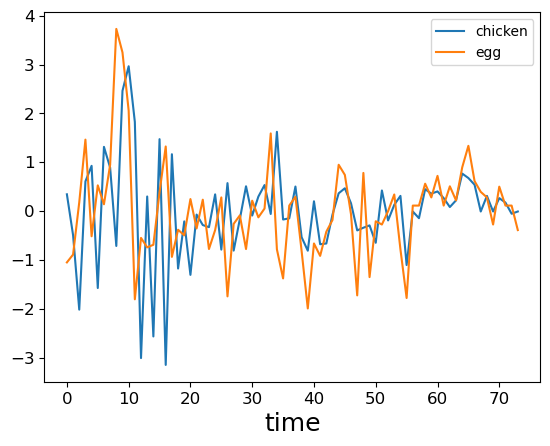

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(chdat, label='chicken')
ax.plot(egdat, label ='egg')
ax.set_xlabel('time', fontsize=fontsize)
ax.legend(loc='upper right', prop={'size': legendFontSize})
#ax.set_title('First derivative of the data, normalized', fontsize=18)
fig.savefig('chicken-egg-data.pdf')
plt.show()

In [5]:
Nembed = 4

egcond = {}
wlist = [4,3,2,1,0.5]
for w in wlist:
    cond = np.logical_and(egdat<w, egdat>-w)
    egcondi = [len(cond)*[True]]
    for i in range(1,Nembed+1):
        egcondi.append(np.concatenate( (i*[False], cond[:-i]) ))
    egcondi = np.array(egcondi)
    for i in range(1, len(egcondi)):
        egcondi[i] = np.logical_and(egcondi[i-1], egcondi[i])
    egcond[w] = egcondi

res = []
for w, egi in egcond.items():
    res.append( [[np.sum(cc), np.mean(chdat[cc]), np.std(chdat[cc]), np.mean(egdat[cc]), np.std(egdat[cc]) ] for cc in egi])
res = np.array(res)

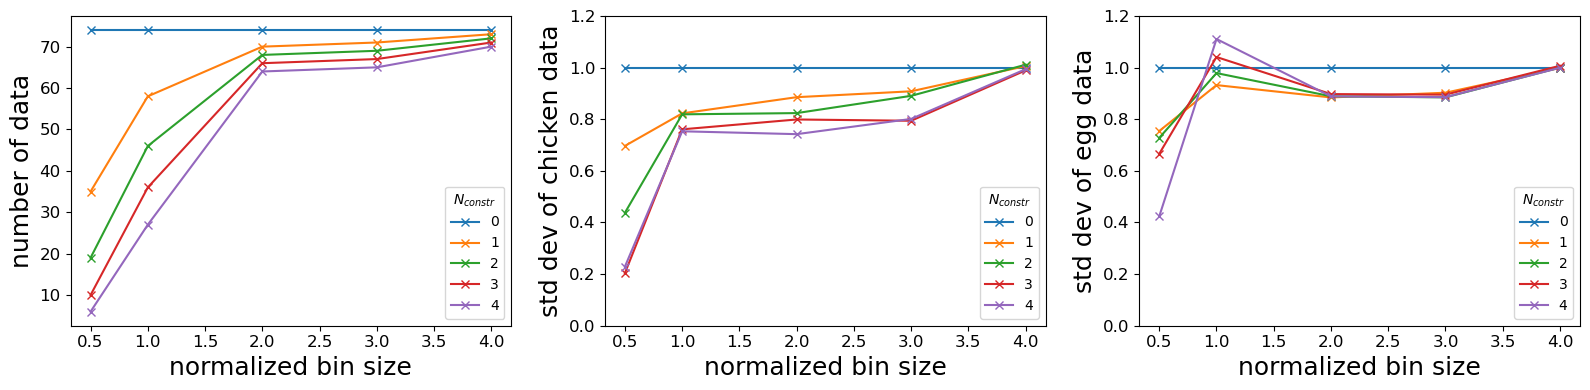

In [6]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(16,4))
for nn in range(Nembed+1):
    ax[0].plot( wlist, res[:, nn, 0], label=nn, marker = 'x')
    ax[1].plot( wlist, res[:, nn, 2], label=nn, marker = 'x')
    ax[2].plot( wlist, res[:, nn, 4], label=nn, marker = 'x')
ax[0].legend(title = r'$N_{constr}$')
ax[0].set_xlabel('normalized bin size', fontsize=fontsize)
ax[0].set_ylabel('number of data', fontsize=fontsize)
ax[1].legend(title = r'$N_{constr}$')
ax[1].set_xlabel('normalized bin size', fontsize=fontsize)
ax[1].set_ylabel('std dev of chicken data', fontsize=fontsize)
ax[1].set_ylim(0,1.2)
ax[2].legend(title = r'$N_{constr}$')
ax[2].set_xlabel('normalized bin size', fontsize=fontsize)
ax[2].set_ylabel('std dev of egg data', fontsize=fontsize)
ax[2].set_ylim(0,1.2)
#fig.suptitle('Constraining the egg data', fontsize=18)
fig.tight_layout(w_pad=2.0)
fig.savefig('egg_constrain.pdf')
plt.show()

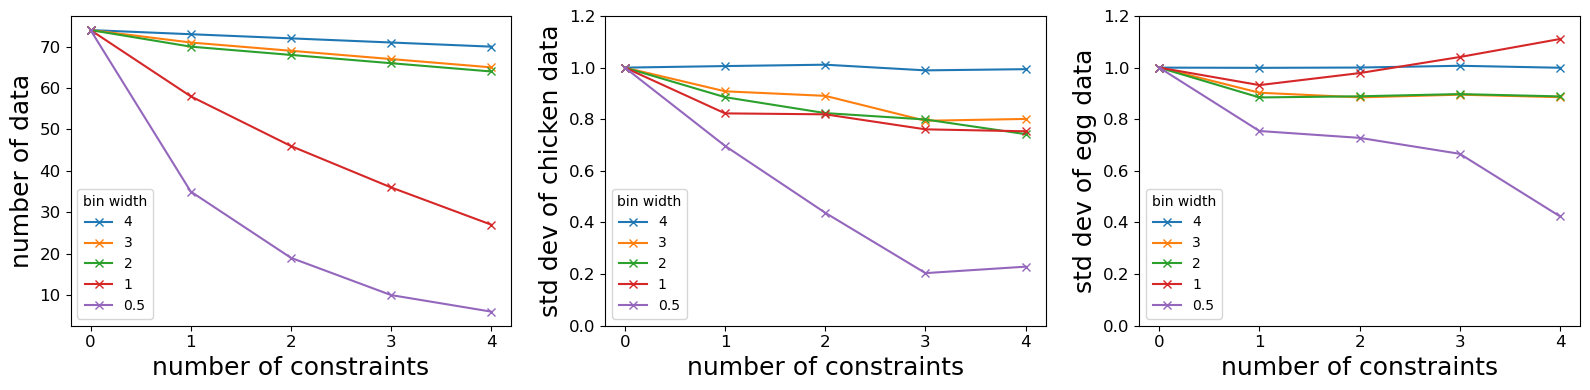

In [7]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(16,4))
for w in range(len(wlist)):
    ax[0].plot( res[w, :, 0], label=wlist[w], marker = 'x')
    ax[1].plot( res[w, :, 2], label=wlist[w], marker = 'x')
    ax[2].plot( res[w, :, 4], label=wlist[w], marker = 'x')
ax[0].legend(title = r'bin width')
ax[0].set_xlabel('number of constraints', fontsize=fontsize)
ax[0].set_ylabel('number of data', fontsize=fontsize)
ax[1].legend(title = r'bin width')
ax[1].set_xlabel('number of constraints', fontsize=fontsize)
ax[1].set_ylabel('std dev of chicken data', fontsize=fontsize)
ax[1].set_ylim(0,1.2)
ax[2].legend(title = r'bin width')
ax[2].set_xlabel('number of constraints', fontsize=fontsize)
ax[2].set_ylabel('std dev of egg data', fontsize=fontsize)
ax[2].set_ylim(0,1.2)
#fig.suptitle('Constraining the egg data', fontsize=18)
fig.tight_layout(w_pad=2.0)
fig.savefig('egg_constrain_nconstr.pdf')
plt.show()

In [8]:
Nembed = 4

egcond = {}
wlist = [5,4,3,2,1,0.5]
for w in wlist:
    cond = np.logical_and(chdat<w, chdat>-w)
    egcondi = [len(cond)*[True]]
    for i in range(1,Nembed+1):
        egcondi.append(np.concatenate( (i*[False], cond[:-i]) ))
    egcondi = np.array(egcondi)
    for i in range(1, len(egcondi)):
        egcondi[i] = np.logical_and(egcondi[i-1], egcondi[i])
    egcond[w] = egcondi

res = []
for w, egi in egcond.items():
    res.append( [[np.sum(cc), np.mean(chdat[cc]), np.std(chdat[cc]), np.mean(egdat[cc]), np.std(egdat[cc]) ] for cc in egi])
res = np.array(res)

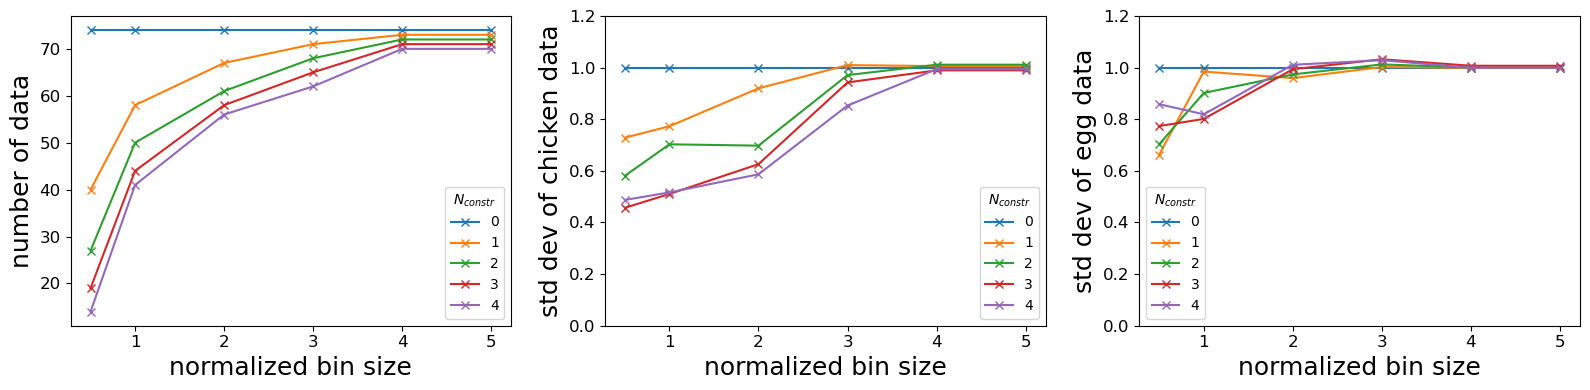

In [9]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(16,4))
for nn in range(Nembed+1):
    ax[0].plot( wlist, res[:, nn, 0], label=nn, marker = 'x')
    ax[1].plot( wlist, res[:, nn, 2], label=nn, marker = 'x')
    ax[2].plot( wlist, res[:, nn, 4], label=nn, marker = 'x')
ax[0].legend(title = r'$N_{constr}$')
ax[0].set_xlabel('normalized bin size', fontsize=fontsize)
ax[0].set_ylabel('number of data', fontsize=fontsize)
ax[1].legend(title = r'$N_{constr}$')
ax[1].set_xlabel('normalized bin size', fontsize=fontsize)
ax[1].set_ylabel('std dev of chicken data', fontsize=fontsize)
ax[1].set_ylim(0,1.2)
ax[2].legend(title = r'$N_{constr}$')
ax[2].set_xlabel('normalized bin size', fontsize=fontsize)
ax[2].set_ylabel('std dev of egg data', fontsize=fontsize)
ax[2].set_ylim(0,1.2)
#fig.suptitle('Constraining the chicken data', fontsize=18)
fig.tight_layout(w_pad=2.0)
fig.savefig('chicken_constrain.pdf')
plt.show()

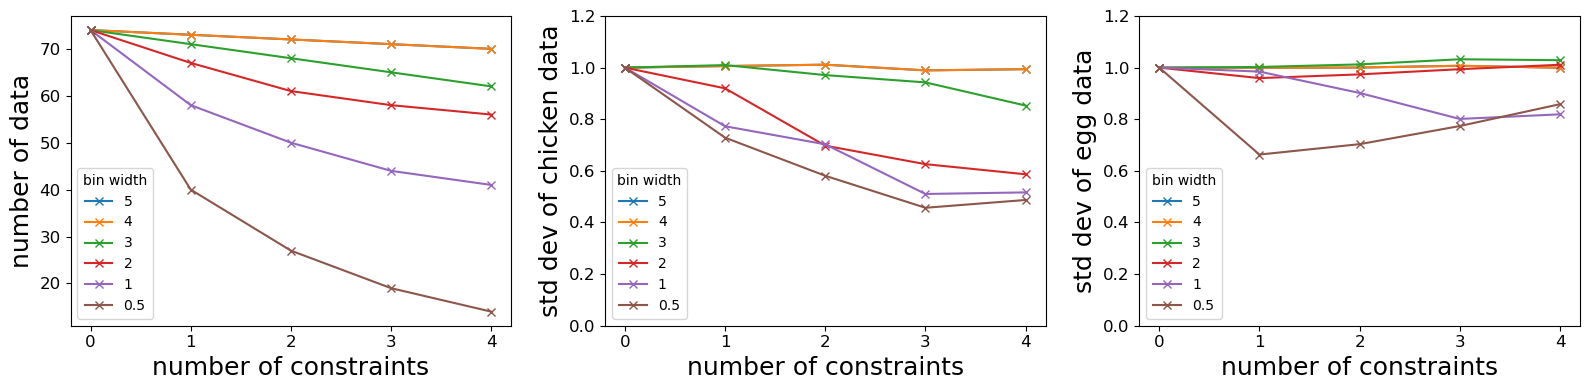

In [10]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(16,4))
for w in range(len(wlist)):
    ax[0].plot( res[w, :, 0], label=wlist[w], marker = 'x')
    ax[1].plot( res[w, :, 2], label=wlist[w], marker = 'x')
    ax[2].plot( res[w, :, 4], label=wlist[w], marker = 'x')
ax[0].legend(title = r'bin width')
ax[0].set_xlabel('number of constraints', fontsize=fontsize)
ax[0].set_ylabel('number of data', fontsize=fontsize)
ax[1].legend(title = r'bin width')
ax[1].set_xlabel('number of constraints', fontsize=fontsize)
ax[1].set_ylabel('std dev of chicken data', fontsize=fontsize)
ax[1].set_ylim(0,1.2)
ax[2].legend(title = r'bin width')
ax[2].set_xlabel('number of constraints', fontsize=fontsize)
ax[2].set_ylabel('std dev of egg data', fontsize=fontsize)
ax[2].set_ylim(0,1.2)
#fig.suptitle('Constraining the chicken data', fontsize=18)
fig.tight_layout(w_pad=2.0)
fig.savefig('chicken_constrain_nconstr.pdf')
plt.show()